Mario Amador Hurtado 1637543

Albert Garcia Uría 1637521

# **Hash functions**

Imports

In [1]:
import hashlib
from typing import Optional, Tuple

## Exercici 1

In [2]:
def uab_md5(message: str, num_bits: int) -> Optional[int]:
    try:
        h = hashlib.md5(message.encode()).hexdigest()
        hash_int = int(h, 16)
        hash_bin = format(hash_int, "0128b")
        if num_bits > 128 or num_bits <= 0:
            raise ValueError()
        return int(hash_bin[:num_bits], 2)
    except:
        return None

print(uab_md5("hola", 1))

0


## Exercici 2

In [3]:
import random
import string

def second_preimage(message: str, num_bits: int):
    collision = False
    i = 0
    ref = uab_md5(message, num_bits)

    while not collision:
        pi = ''.join(random.choices(string.ascii_letters + string.digits, k=10))
        pi_hash = uab_md5(pi, num_bits)

        if pi != message:
            collision = pi_hash == ref
            
        i += 1
    return pi, i-1
print(second_preimage("hola", 20)) 

('ZqAjYwb0bx', 195717)


## Exercici 3

In [4]:
def collision(num_bits: int) -> Optional[Tuple[str, str, int]]:
    hashes = {}
    i=0
    while True:
        pi = ''.join(random.choices(string.ascii_letters + string.digits, k=10))
        h = uab_md5(pi, num_bits)

        if h in hashes.keys():
            if pi not in hashes.values():
                return pi, hashes[h], i
        
        hashes[h] = pi
        i += 1
    return

print(collision(20)) 

('KD5ACaEltF', 'CMpm0kUuiG', 1372)


## Exercici 4

### Part A

In [5]:
import time
from tqdm import tqdm
preimage_iter = []
collision_iter = []

preimage_time = []
collision_time = []

for i in tqdm(range(1,25), desc='Progreso', unit=' iteración'):
    start = time.perf_counter()
    _, iter = second_preimage("hola", i)
    end = time.perf_counter()
    preimage_iter.append(iter)
    preimage_time.append(end-start)

    start = time.perf_counter()
    _, _, iter =collision(i)
    end = time.perf_counter()
    collision_iter.append(iter)
    collision_time.append(end-start)

print(preimage_iter)
print(preimage_time)

print(collision_iter)
print(collision_time)

Progreso: 100%|██████████| 24/24 [01:03<00:00,  2.66s/ iteración]

[1, 0, 6, 14, 14, 100, 78, 188, 261, 607, 957, 3391, 6980, 15357, 15556, 194138, 38234, 364323, 160812, 45930, 1462736, 3418395, 3271225, 2952439]
[4.129999999991085e-05, 9.399999999715192e-06, 4.989999999960304e-05, 8.039999999986946e-05, 8.010000000036044e-05, 0.0005418999999999841, 0.00042700000000017724, 0.0010075999999998864, 0.0014522000000001256, 0.006828699999999799, 0.005111299999999819, 0.01848570000000027, 0.0378908, 0.08756619999999993, 0.0882445999999999, 1.0489348000000005, 0.1994360000000004, 1.9442154999999994, 0.8600412999999998, 0.24536659999999966, 7.836348800000001, 18.2454634, 17.3062891, 15.831592]
[2, 3, 4, 3, 5, 5, 6, 8, 27, 24, 102, 67, 85, 131, 340, 441, 320, 94, 280, 2330, 3422, 3214, 7125, 9804]
[2.2599999999872722e-05, 2.3399999999895726e-05, 2.8400000000150527e-05, 2.6000000000081513e-05, 3.419999999998424e-05, 3.470000000005413e-05, 4.220000000021429e-05, 5.710000000025417e-05, 0.00024639999999997997, 0.00014340000000023778, 0.0005623999999997409, 0.00037

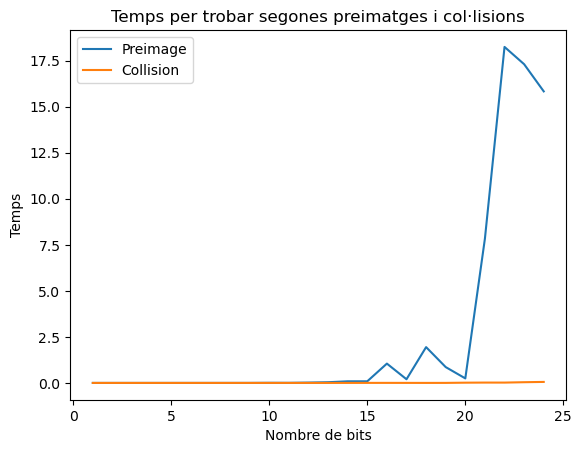

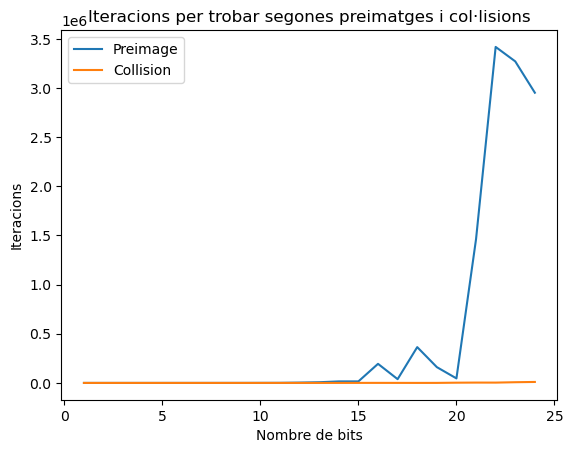

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(1, 25), preimage_time, label = "Preimage")
plt.plot(range(1, 25), collision_time, label = "Collision")
plt.xlabel('Nombre de bits')
plt.ylabel('Temps')
plt.title('Temps per trobar segones preimatges i col·lisions')
plt.legend()
plt.show()

plt.plot(range(1, 25), preimage_iter, label = "Preimage")
plt.plot(range(1, 25), collision_iter, label = "Collision")
plt.xlabel('Nombre de bits')
plt.ylabel('Iteracions')
plt.title('Iteracions per trobar segones preimatges i col·lisions')
plt.legend()
plt.show()

In [8]:
from tabulate import tabulate

taula = list(zip(preimage_time, collision_time))
print("ITERACIONS")
print(tabulate(taula, headers=['Segona preimatge', 'Col·lisions'], tablefmt='grid'))

ITERACIONS
+--------------------+---------------+
|   Segona preimatge |   Col·lisions |
+====================+===============+
|          4.13e-05  |     2.26e-05  |
+--------------------+---------------+
|          9.4e-06   |     2.34e-05  |
+--------------------+---------------+
|          4.99e-05  |     2.84e-05  |
+--------------------+---------------+
|          8.04e-05  |     2.6e-05   |
+--------------------+---------------+
|          8.01e-05  |     3.42e-05  |
+--------------------+---------------+
|          0.0005419 |     3.47e-05  |
+--------------------+---------------+
|          0.000427  |     4.22e-05  |
+--------------------+---------------+
|          0.0010076 |     5.71e-05  |
+--------------------+---------------+
|          0.0014522 |     0.0002464 |
+--------------------+---------------+
|          0.0068287 |     0.0001434 |
+--------------------+---------------+
|          0.0051113 |     0.0005624 |
+--------------------+---------------+
|          0.0

In [9]:
print("TEMPS")
taula = list(zip(preimage_iter, collision_iter))
print(tabulate(taula, headers=['Segona preimatge', 'Col·lisions'], tablefmt='grid'))

TEMPS
+--------------------+---------------+
|   Segona preimatge |   Col·lisions |
+====================+===============+
|                  1 |             2 |
+--------------------+---------------+
|                  0 |             3 |
+--------------------+---------------+
|                  6 |             4 |
+--------------------+---------------+
|                 14 |             3 |
+--------------------+---------------+
|                 14 |             5 |
+--------------------+---------------+
|                100 |             5 |
+--------------------+---------------+
|                 78 |             6 |
+--------------------+---------------+
|                188 |             8 |
+--------------------+---------------+
|                261 |            27 |
+--------------------+---------------+
|                607 |            24 |
+--------------------+---------------+
|                957 |           102 |
+--------------------+---------------+
|               339

### Part B

In [10]:
import math

def n_teoric_preimage(num_bits : int) -> float:
    return 2** (num_bits - 1) / 2

def n_teoric_collision(num_bits : int) -> float:
    return math.sqrt(math.log(2)) * 2**((num_bits+1)/2)

preimage_teoric_iter = []
collision_teoric_iter = []

for i in range (1,25):
    preimage_teoric_iter.append(n_teoric_preimage(i))
    collision_teoric_iter.append(n_teoric_collision(i))
    

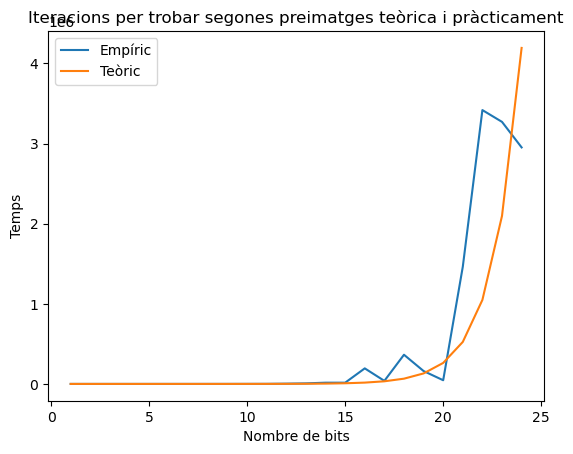

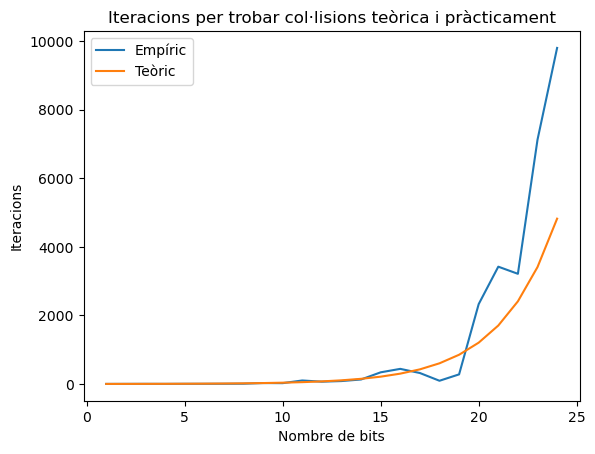

In [11]:
plt.plot(range(1, 25), preimage_iter, label = "Empíric")
plt.plot(range(1, 25), preimage_teoric_iter, label = "Teòric")
plt.xlabel('Nombre de bits')
plt.ylabel('Temps')
plt.title('Iteracions per trobar segones preimatges teòrica i pràcticament')
plt.legend()
plt.show()

plt.plot(range(1, 25), collision_iter, label = "Empíric")
plt.plot(range(1, 25), collision_teoric_iter, label = "Teòric")
plt.xlabel('Nombre de bits')
plt.ylabel('Iteracions')
plt.title('Iteracions per trobar col·lisions teòrica i pràcticament')
plt.legend()
plt.show()

## Proves

In [12]:
import unittest
class TestLab1(unittest.TestCase):
    
    def test_uab_md5(self):
        test_vectors_ok = (
        ["hola", 100, 381757249806289069081790873225],
        ["hola", 1, 0],
        ["dfk3874", 68, 229291433845740375560],
        ["dfk3874", 64, 14330714615358773472],
        ["Alexandria", 128, 221630910082124901698625759824682079437],
        ["Alexandria", 129, None],
        ["Alexandria", 0, None])
        for t in test_vectors_ok:
            my_value = uab_md5(t[0], t[1])
            print(my_value, t[2])
            self.assertEqual(my_value, t[2])

    def test_second_preimage(self):
        msg = "find a second preimage"
        for n in range(1, 15):
            new_msg, _ = second_preimage(msg, n)
            self.assertEqual(uab_md5(new_msg, n), uab_md5(msg, n))
            self.assertNotEqual(new_msg, msg)

    def test_collision(self):
        for n in range(1, 15):
            msg1, msg2, _ = collision(n)
            self.assertEqual(uab_md5(msg1, n), uab_md5(msg2, n))
            self.assertNotEqual(msg1, msg2)
unittest.main(argv=[''], verbosity=2, exit=False, buffer=True)

test_collision (__main__.TestLab1) ... ok
test_second_preimage (__main__.TestLab1) ... ok
test_uab_md5 (__main__.TestLab1) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.309s

OK
